In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [72]:
df= pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [75]:
df.describe(include='O').T

,count,unique,top,freq
Gender,110527,2,F,71840
ScheduledDay,110527,103549,2016-05-06T07:09:54Z,24
AppointmentDay,110527,27,2016-06-06T00:00:00Z,4692
Neighbourhood,110527,81,JARDIM CAMBURI,7717
No-show,110527,2,No,88208


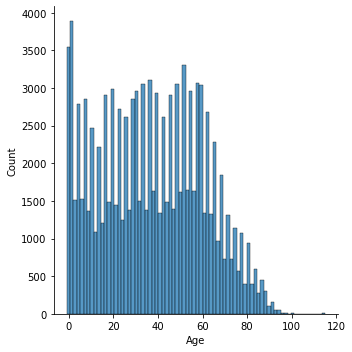

In [76]:
sns.displot(df['Age'])

In [77]:
df[df["Age"]<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [78]:
df=df[~df["Age"]<0]

In [79]:
df[df["Age"]==0]['Age'].count()

3539

In [80]:
def categrizAge(age):
    if age in range(0,15):
        return 'Children'
    elif age in range(15,25):
        return'Youth'
    elif age in range (25,65):
        return 'Adults'
    else :
        return 'grand older'


In [81]:
df['Age']=df['Age'].apply(categrizAge)


<AxesSubplot:xlabel='Age', ylabel='count'>

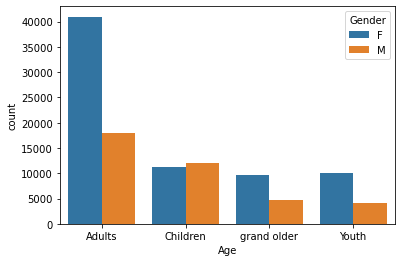

In [82]:
sns.countplot(data=df,x='Age', hue  ='Gender')

In [83]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], errors='coerce').dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], errors='coerce').dt.date


In [90]:
df['No-show'].unique()

array(['showed', 'notshowed'], dtype=object)

In [86]:
df['No-show'] = df['No-show'].replace({'No': "showed", 'Yes': "notshowed"})


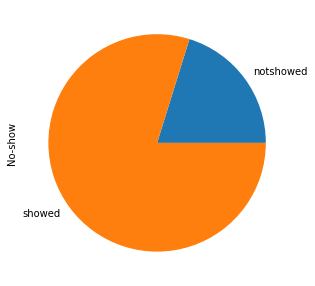

In [87]:
df.groupby("No-show")["No-show"].count().plot(figsize=(5,5),kind="pie");


<AxesSubplot:xlabel='No-show', ylabel='count'>

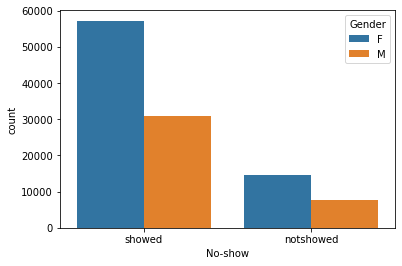

In [88]:
sns.countplot(data=df,x='No-show', hue  ='Gender')

<AxesSubplot:xlabel='No-show', ylabel='count'>

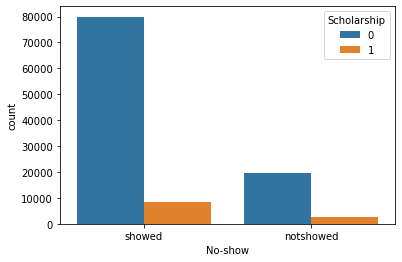

In [91]:
sns.countplot(data=df,x='No-show', hue  ='Scholarship')

In [95]:
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 [Text(0, 0, 'JARDIM DA PENHA'),
  Text(1, 0, 'MATA DA PRAIA'),
  Text(2, 0, 'PONTAL DE CAMBURI'),
  Text(3, 0, 'REPÚBLICA'),
  Text(4, 0, 'GOIABEIRAS'),
  Text(5, 0, 'ANDORINHAS'),
  Text(6, 0, 'CONQUISTA'),
  Text(7, 0, 'NOVA PALESTINA'),
  Text(8, 0, 'DA PENHA'),
  Text(9, 0, 'TABUAZEIRO'),
  Text(10, 0, 'BENTO FERREIRA'),
  Text(11, 0, 'SÃO PEDRO'),
  Text(12, 0, 'SANTA MARTHA'),
  Text(13, 0, 'SÃO CRISTÓVÃO'),
  Text(14, 0, 'MARUÍPE'),
  Text(15, 0, 'GRANDE VITÓRIA'),
  Text(16, 0, 'SÃO BENEDITO'),
  Text(17, 0, 'ILHA DAS CAIEIRAS'),
  Text(18, 0, 'SANTO ANDRÉ'),
  Text(19, 0, 'SOLON BORGES'),
  Text(20, 0, 'BONFIM'),
  T

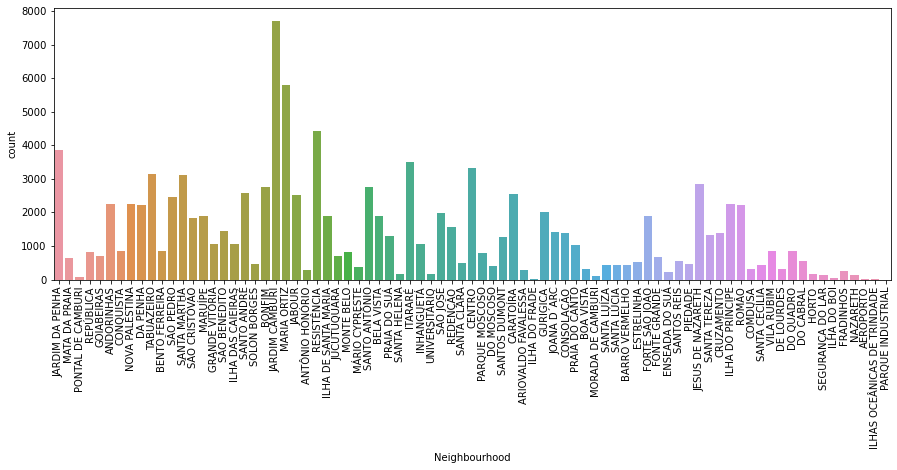

In [107]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Neighbourhood')
plt.xticks(rotation = 90)


In [111]:

df.groupby(["No-show",'Hipertension','Diabetes',"Alcoholism"], as_index=False).size()


,No-show,Hipertension,Diabetes,Alcoholism,size
0,notshowed,0,0,0,17838
1,notshowed,0,0,1,420
2,notshowed,0,1,0,276
3,notshowed,0,1,1,13
4,notshowed,1,0,0,2433
5,notshowed,1,0,1,198
6,notshowed,1,1,0,1095
7,notshowed,1,1,1,46
8,showed,0,0,0,67473
9,showed,0,0,1,1537
